In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import pyplot

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv(r"C:\Users\SUDHANSHU\Downloads\avocado.csv")
data.drop("Unnamed: 0", axis=1,inplace=True)
names = ['Date', 'AveragePrice', 'TotalVolume', 'Small', 'Large', 'XLarge', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type', 'Year' ,'Region']
data = data.rename(columns=dict(zip(data.columns, names)))
data.head()

,Date,AveragePrice,TotalVolume,Small,Large,XLarge,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   TotalVolume   18249 non-null  float64
 3   Small         18249 non-null  float64
 4   Large         18249 non-null  float64
 5   XLarge        18249 non-null  float64
 6   TotalBags     18249 non-null  float64
 7   SmallBags     18249 non-null  float64
 8   LargeBags     18249 non-null  float64
 9   XLargeBags    18249 non-null  float64
 10  Type          18249 non-null  object 
 11  Year          18249 non-null  int64  
 12  Region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [4]:
data.describe(include='all')

,Date,AveragePrice,TotalVolume,Small,Large,XLarge,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2017-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Atlanta
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


In [5]:
data.Type.unique()

array(['conventional', 'organic'], dtype=object)

In [6]:
data.Year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

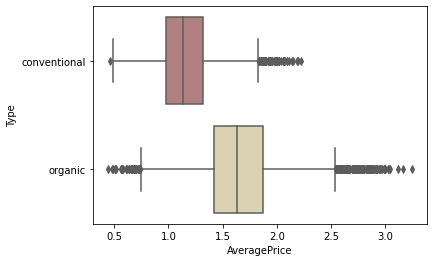

In [7]:
sns.boxplot(y="Type", x="AveragePrice", data=data, palette = 'pink')

In [8]:
label = LabelEncoder()
dicts = {}

label.fit(data.Type.drop_duplicates()) 
dicts['Type'] = list(label.classes_)
data.Type = label.transform(data.Type)

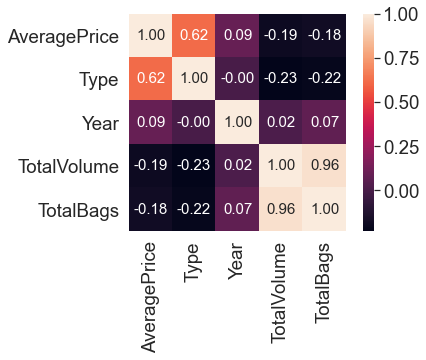

In [9]:
cols = ['AveragePrice','Type','Year','TotalVolume','TotalBags']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

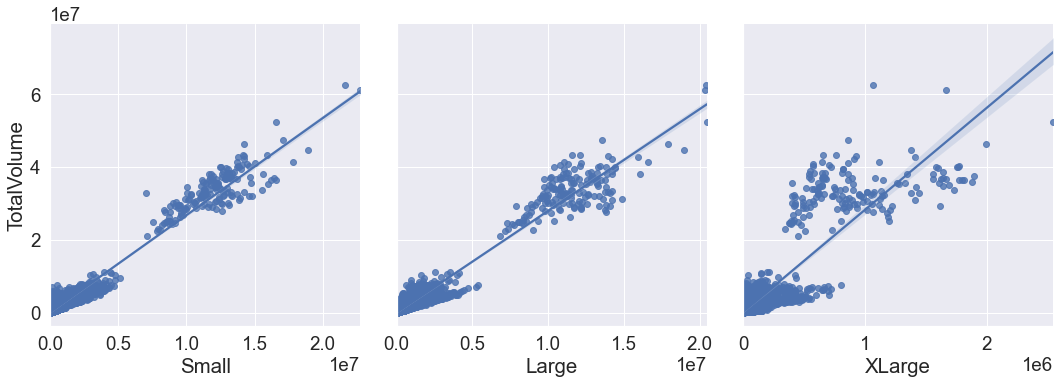

In [10]:
sns.pairplot(data, x_vars=['Small', 'Large', 'XLarge'], y_vars='TotalVolume', size=5, aspect=1, kind='reg')

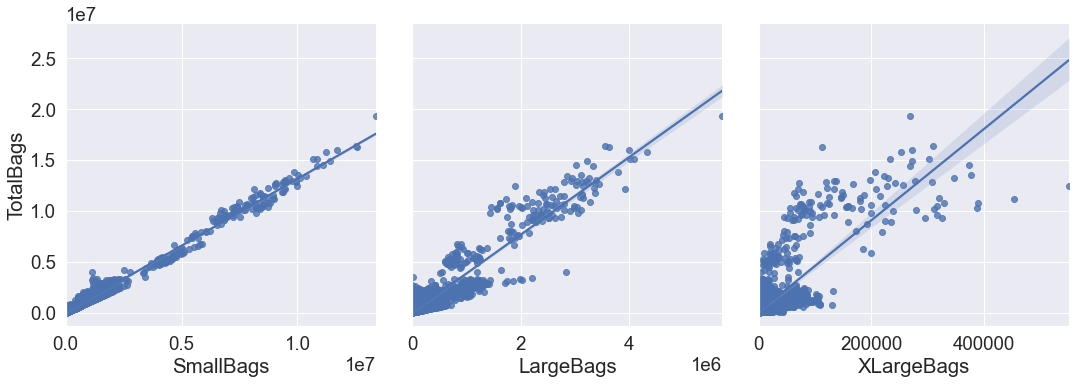

In [11]:
sns.pairplot(data, x_vars=['SmallBags', 'LargeBags', 'XLargeBags'], y_vars='TotalBags', size=5, aspect=1, kind='reg')

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

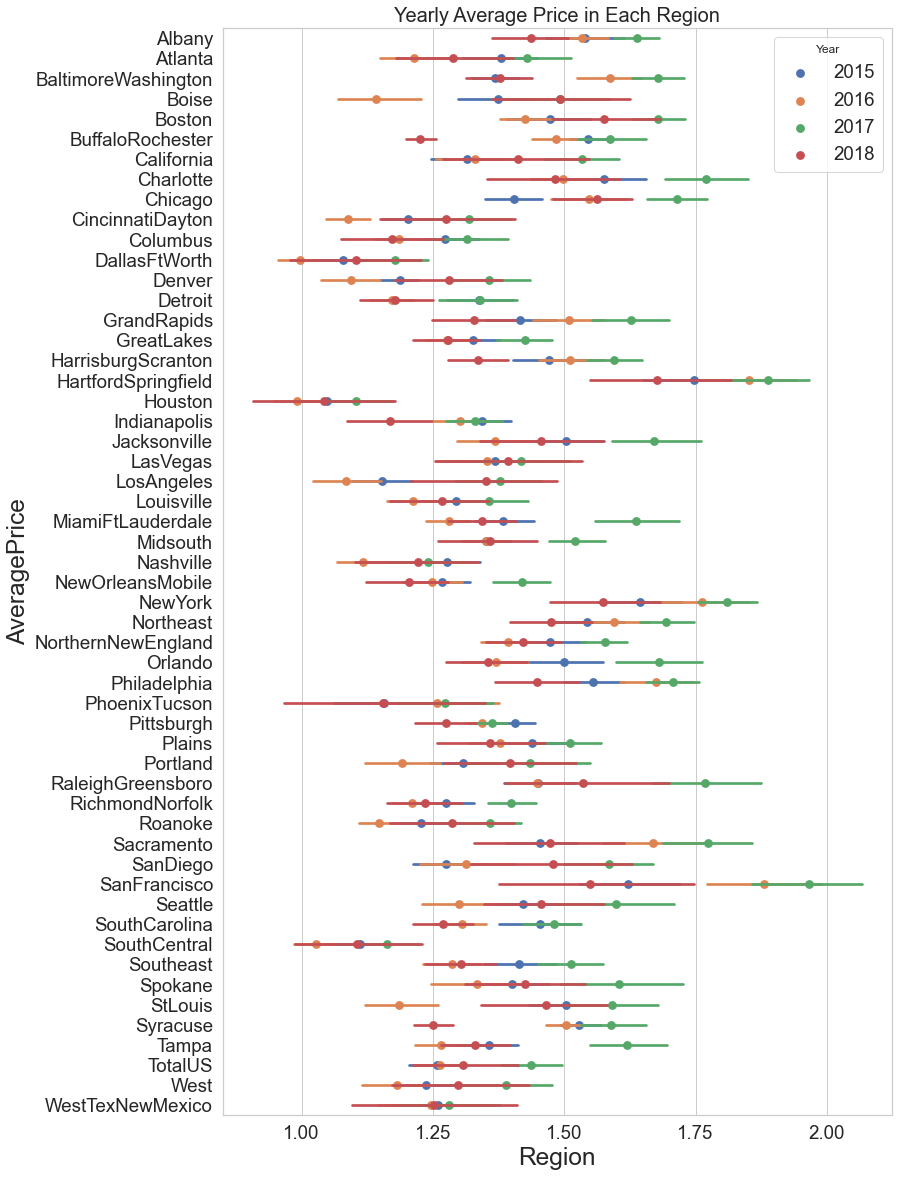

In [12]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='Region',data=data, hue='Year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

Text(0.5, 1.0, 'Type Average Price in Each Region')

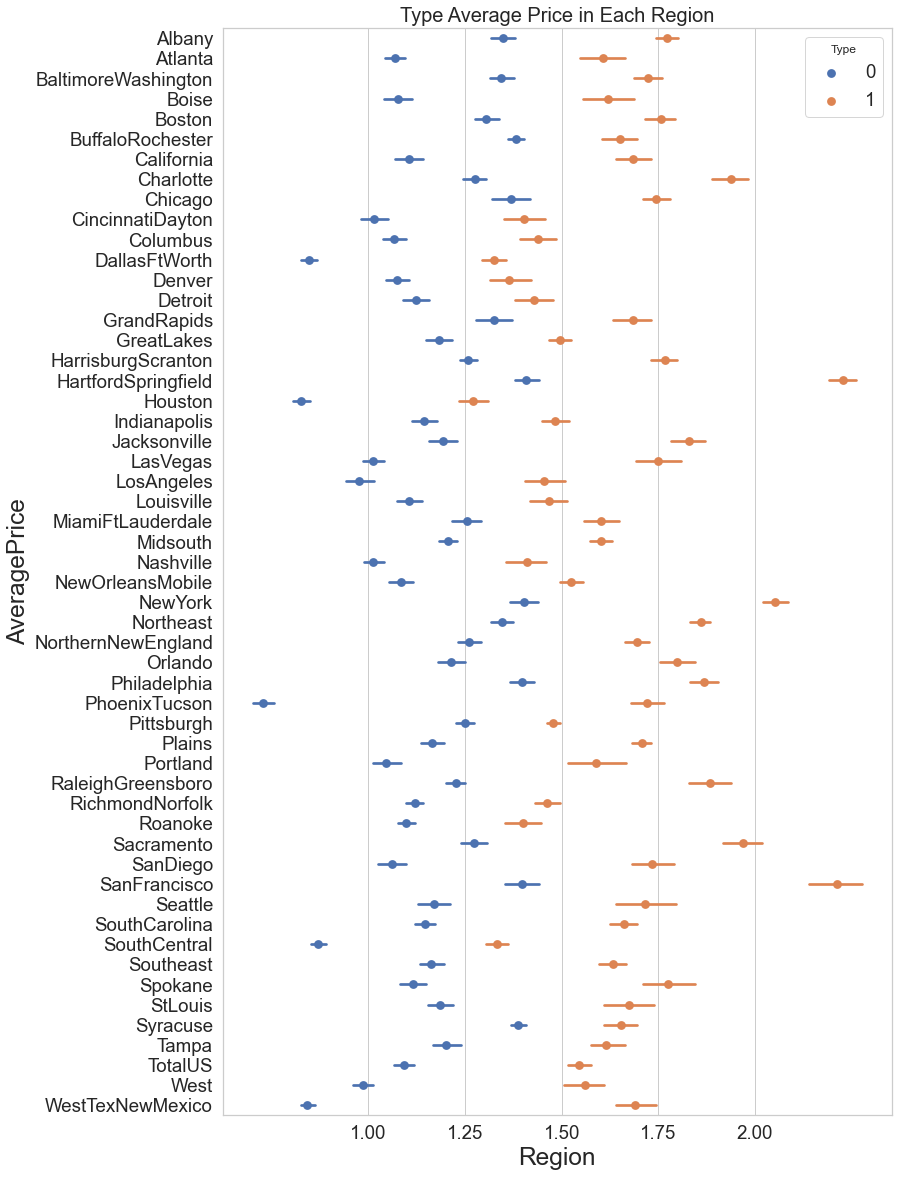

In [13]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='Region', data=data, hue='Type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

In [14]:
X=data[['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags']] #feature columns
y=data.Type #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (14599, 7)
Y Train Shape  (14599,)
X Test Shape  (3650, 7)
Y Test Shape  (3650,)


Accuracy score for Logistic Regression test data is: 0.9402739726027397
----------------------------------------------------------------------------------------
Confusion matrix for logistic regression model
              Predicted organic  Predicted Conventional
organic                    1664                     184
Conventional                 34                    1768
----------------------------------------------------------------------------------------


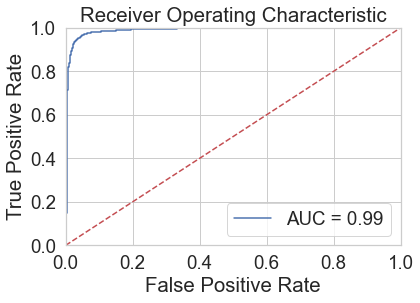

In [15]:
#Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)  

#Acuuracy score
print('Accuracy score for Logistic Regression test data is:', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for logistic regression model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')
#AUC ROC Curve
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy score for test data using Random Forest : 0.996986301369863
----------------------------------------------------------------------------------------
Confusion matrix for Random forest model
              Predicted organic  Predicted Conventional
organic                    1841                       7
Conventional                  4                    1798
--------------------------------------------------------


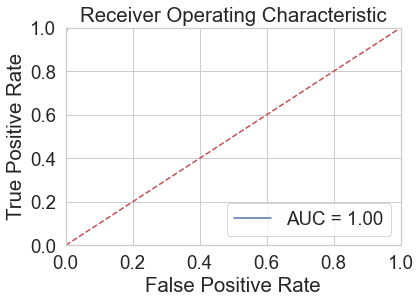

In [16]:
#Randomforest classifier
rfclass = RandomForestClassifier(random_state = 0)
rfclass.fit(X_train, y_train)

y_pred_train = rfclass.predict(X_train)
y_pred_test = rfclass.predict(X_test)

#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Random forest model")
print(confusion_matrix)

print('--------------------------------------------------------')

#AUC ROC Curve
probs = rfclass.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
data.drop(['Date', 'TotalVolume', 'TotalBags', 'Region', 'Year'], axis = 1,inplace = True)

In [18]:
data.columns

Index(['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags',
       'XLargeBags', 'Type'],
      dtype='object')

In [19]:
scaler = StandardScaler().fit(data)
data_avocado_scaler = scaler.transform(data)
data_avocado = pd.DataFrame(data_avocado_scaler)
data_avocado.columns = ['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
data_avocado.head()

,AveragePrice,Small,Large,XLarge,SmallBags,LargeBags,XLargeBags,Type
0,-0.188689,-0.230816,-0.199902,-0.212091,-0.232647,-0.222352,-0.17558,-0.999836
1,-0.139020,-0.231103,-0.208054,-0.211997,-0.231568,-0.222335,-0.17558,-0.999836
2,-1.182069,-0.231007,-0.154478,-0.211325,-0.233399,-0.222311,-0.17558,-0.999836
3,-0.809551,-0.230741,-0.185350,-0.211864,-0.236568,-0.222186,-0.17558,-0.999836
4,-0.312861,-0.230891,-0.208719,-0.211834,-0.236154,-0.221924,-0.17558,-0.999836


In [20]:
feature_cols = ['Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
X = data_avocado[feature_cols]

In [21]:
y = data_avocado.AveragePrice

In [22]:
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [23]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14599, 7)
y_train shape:  (14599,)

Test cases as below
X_test shape:  (3650, 7)
y_test shape:  (3650,)


In [26]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 
    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg
 

In [27]:
linreg = linear_reg(X,y)

In [28]:
linreg.score(X,y)

0.3980206520577072

In [29]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: -0.002505711970250271
Coefficients: [-0.31332629  0.32039105 -0.12354322  0.06163263 -0.07300029  0.07633143
  0.60580356]


In [30]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [31]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.002505711970250271
Small -0.3133262880926914
Large 0.3203910517486838
XLarge -0.12354321842178195
SmallBags 0.06163262769036363
LargeBags -0.07300028791378153
XLargeBags 0.07633142768206123
Type 0.6058035608004645


In [32]:
y_pred_train = linreg.predict(X_train)

In [33]:
y_pred_test = linreg.predict(X_test)

In [34]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

print('----------------------------------------------------------------------------------------')

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

print('----------------------------------------------------------------------------------------')

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for training set is 0.5940526287383294
MAE for test set is 0.5974131265484528
----------------------------------------------------------------------------------------
MSE for training set is 0.6023479204673671
MSE for test set is 0.6005051588207694
----------------------------------------------------------------------------------------
RMSE for training set is 0.7761107655917209
RMSE for test set is 0.7749226792530783


In [36]:
print("Model Evaluation for Linear Regression Model")

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Linear Regression Model
----------------------------------------------------------------------------------------
r_squared for train data  0.39738629390003366  and adjusted_r_squared for train data 0.39709719130646914
----------------------------------------------------------------------------------------
r_squared for test data  0.4005468712569107  and adjusted_r_squared for test data 0.3993947098342854


In [37]:
feature_cols = ['Small', 'SmallBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.38662424075829555
RMSE for the test set is 0.6095675212451105


In [38]:
feature_cols = ['Large', 'LargeBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.38065568476473455
RMSE for the test set is 0.614996203316257


In [40]:
feature_cols = ['XLarge', 'XLargeBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.38102647934077394
RMSE for the test set is 0.6155209636844581


In [41]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state = 0)
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test) 

In [42]:
print("Model Evaluation for Random Forest Regressor ")
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

print('----------------------------------------------------------------------------------------')
yhat = model2.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')
yhat = model2.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Random Forest Regressor 
RMSE for training set is 0.1790500526080848  and RMSE for test set is 0.45827819837318184
----------------------------------------------------------------------------------------
r_squared for train data  0.9679269326826145  and adjusted_r_squared for train data 0.967911545699459
----------------------------------------------------------------------------------------
r_squared for test data  0.7903490267993281  and adjusted_r_squared for test data 0.7899460732539121


-Columns like Type of avocado, size and bags have impact on Average Price, lesser the RMSE value accurate the model is, when we consider Small Hass in Small Bags.
-Random forest Classifier has more accuracy than Logistic regression model for this dataset , accuracy is 0.99 it may also denote it is overfitting as it even classifies the outliers perfectly.
-Random forest classifier model predicts the type of Avocado more accurately than Logistic regression model.
-Random Forest Regressor model predicts the average price more accurately than linear regression model.

In [50]:
#saving the random forest regressor
import joblib
joblib.dump(model2,'Avocado.pkl')


['Avocado.pkl']